In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

In [6]:
import os
os.chdir("C:/Users/USER/Documents/my_DS_projects/UNSUPERVISED/credit-fear-clustering")
print("Current Directory:", os.getcwd())

Current Directory: C:\Users\USER\Documents\my_DS_projects\UNSUPERVISED\credit-fear-clustering


In [12]:
# Load Data
df = pd.read_csv("SCFP2019.csv")

# Display basic information
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (28885, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


# Explore

In [13]:
# Filter households that are credit fearful
mask = df['TURNFEAR'] == 1
df_fear = df[mask]
print("Credit-Fearful Households Shape:", df_fear.shape)

Credit-Fearful Households Shape: (4623, 356)


## Age Analysis

In [21]:
# Age group mapping
agecl_dict = {
    1: "Under 35", 2: "35-44", 3: "45-54",
    4: "55-64", 5: "65-74", 6: "75 or Older"
}

df_fear = df_fear.copy()  # Ensure df_fear is a separate DataFrame
df_fear['AGE_GROUP'] = df_fear['AGECL'].replace(agecl_dict)

print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (4623, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,AGE_GROUP
5,2,21,3790.476607,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
6,2,22,3798.868505,1,50,3,8,2,1,3,...,2,1,2,1,1,4,3,2,2,45-54
7,2,23,3799.468393,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
8,2,24,3788.076005,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
9,2,25,3793.066589,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54


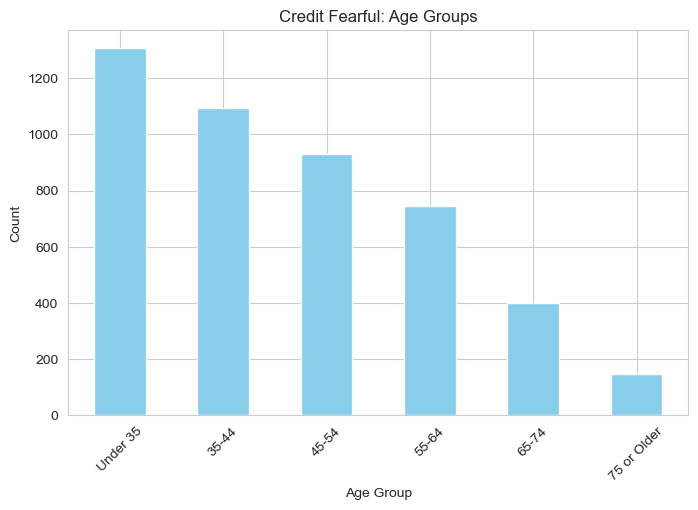

In [22]:
# Age group distribution
plt.figure(figsize=(8,5))
df_fear['AGE_GROUP'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Credit Fearful: Age Groups")
plt.xticks(rotation=45)
plt.show()

Our chart is telling us that many of the people who fear being denied credit are younger. 

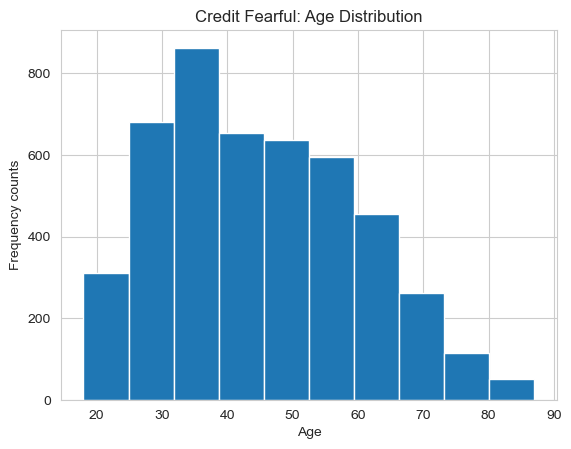

In [24]:
# Plot histogram of "AGE"
df_fear['AGE'].hist(bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency counts')
plt.title('Credit Fearful: Age Distribution');

It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are most concerned seem to be between 30 and 40

## RACE Analysis

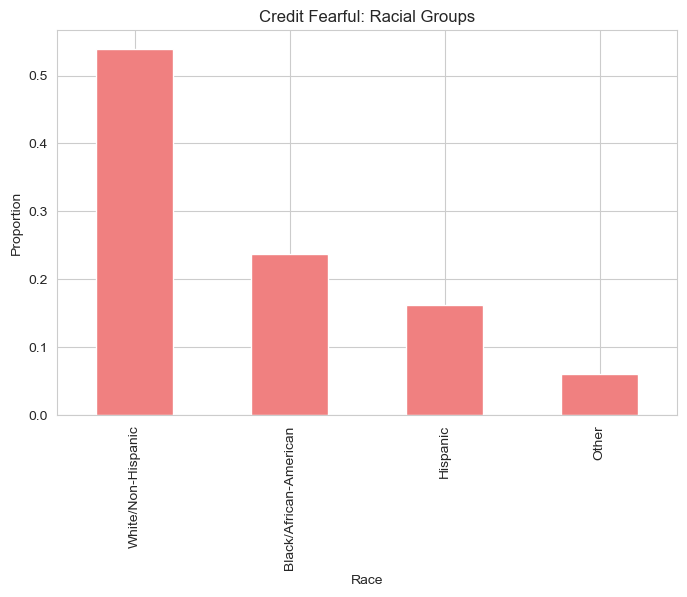

In [23]:
race_dict = {1: "White/Non-Hispanic", 2: "Black/African-American", 3: "Hispanic", 5: "Other"}
df_fear['RACE_GROUP'] = df_fear['RACE'].replace(race_dict)

plt.figure(figsize=(8,5))
df_fear['RACE_GROUP'].value_counts(normalize=True).plot(kind='bar', color='lightcoral')
plt.xlabel("Race")
plt.ylabel("Proportion")
plt.title("Credit Fearful: Racial Groups")
plt.show()

### Recreate the  bar chart i just made, but this time use the entire dataset df instead of the subset df_fear

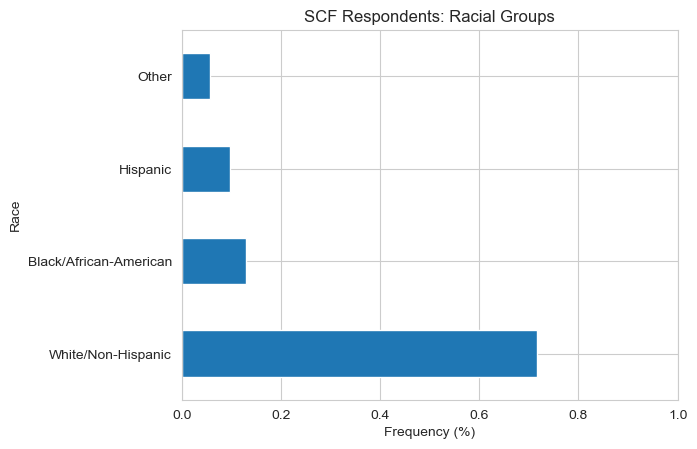

In [25]:
race = df['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = 'barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

## Income

In [27]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df['INCCAT']
    .replace(inccat_dict)
    .groupby(df['TURNFEAR'])
    .value_counts(normalize = True)
    .rename('frequency')
    .to_frame()
    .reset_index()
)

print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


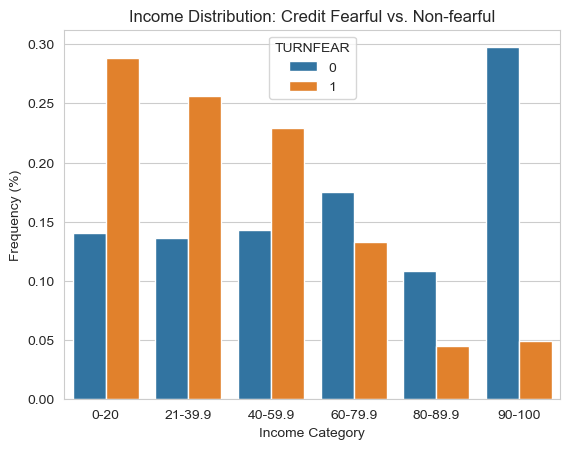

In [28]:
# Create bar chart of `df_inccat`
sns.barplot(
    x = 'INCCAT',
    y = 'frequency',
    hue = 'TURNFEAR',
    data = df_inccat,
    order = inccat_dict.values()
    
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes.

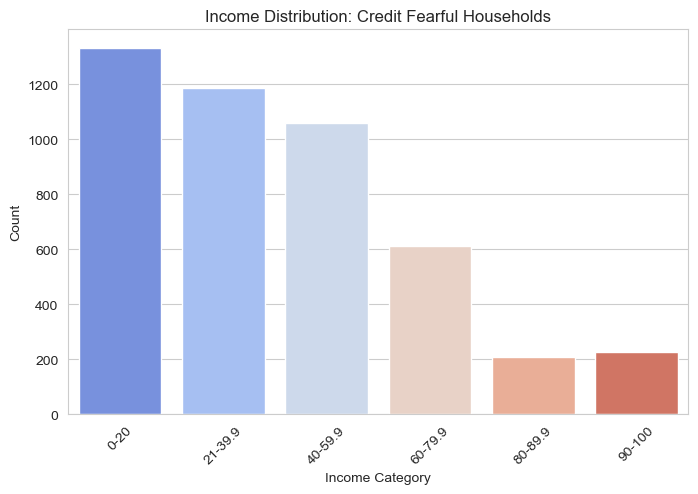

In [26]:
inccat_dict = {
    1: "0-20", 2: "21-39.9", 3: "40-59.9", 4: "60-79.9", 5: "80-89.9", 6: "90-100"
}
df_fear['INCOME_CATEGORY'] = df_fear['INCCAT'].replace(inccat_dict)

plt.figure(figsize=(8,5))
sns.countplot(x='INCOME_CATEGORY', data=df_fear, order=inccat_dict.values(), palette='coolwarm')
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.title("Income Distribution: Credit Fearful Households")
plt.xticks(rotation=45)
plt.show()

## ASSET

In [29]:
asset_house_corr = df['ASSET'].corr(df['HOUSES'])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544793153


That's a moderate positive correlation, which we would probably expect, right? 

In [31]:
asset_house_corr = df_fear['ASSET'].corr(df_fear['HOUSES'])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735998714


Aha! They're different! It's still only a moderate positive correlation, but the relationship between the total value of assets and the value of the primary residence is stronger for our TURNFEAR group than it is for the population as a whole

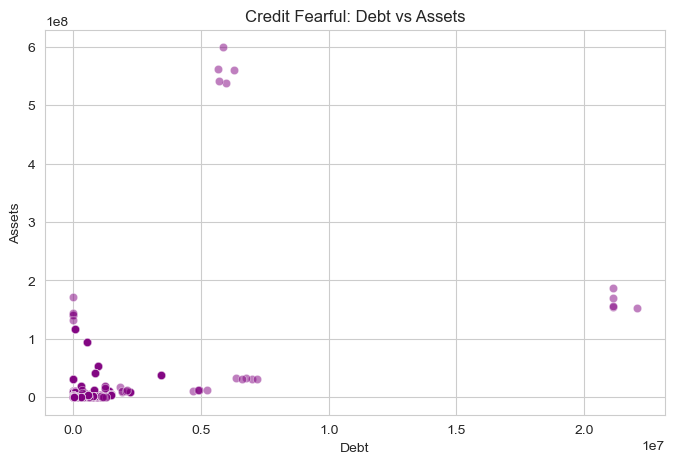

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_fear['DEBT'], y=df_fear['ASSET'], alpha=0.5, color='purple')
plt.xlabel("Debt")
plt.ylabel("Assets")
plt.title("Credit Fearful: Debt vs Assets")
plt.show()

## Education Analysis

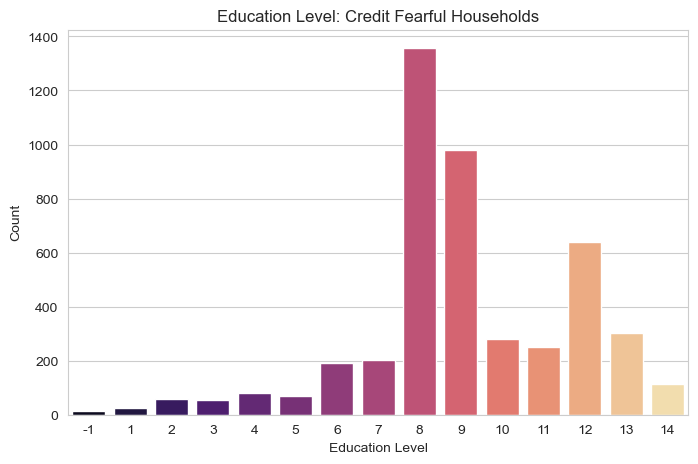

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='EDUC', data=df_fear, palette='magma')
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level: Credit Fearful Households")
plt.show()

In [35]:
df_educ = (
    df['EDUC']
    .groupby(df['TURNFEAR'])
    .value_counts(normalize = True)
    .rename('frequency')
    .to_frame()
    .reset_index()
)
print("df_educ type:", type(df_educ))
print("df_educ shape:", df_educ.shape)
df_educ.head()

df_educ type: <class 'pandas.core.frame.DataFrame'>
df_educ shape: (30, 3)


,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


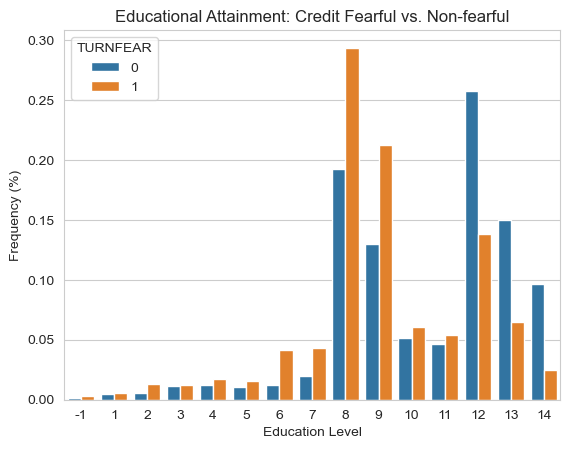

In [36]:
# Create bar chart of `df_educ`
sns.barplot(
    x = 'EDUC',
    y = 'frequency',
    hue = 'TURNFEAR',
    data = df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

## Correlation Matrix

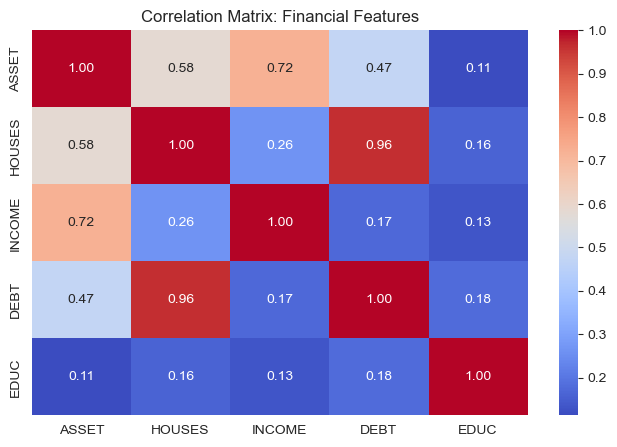

In [ ]:
# Correlation matrix for fearful house hold
selected_cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr_matrix = df_fear[selected_cols].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Financial Features")
plt.show()

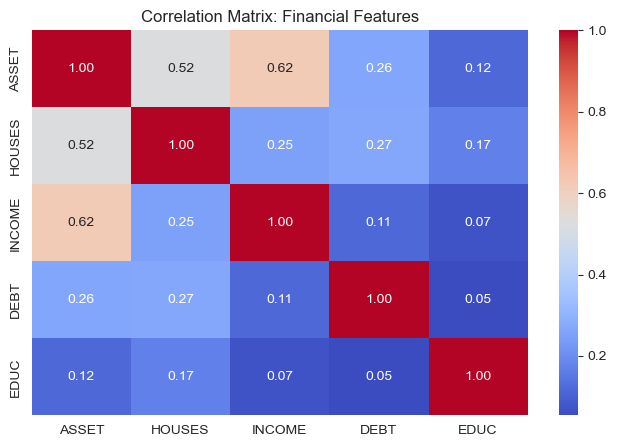

In [34]:
# Correlatio analysis for non credit fearful

selected_cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr_matrix = df[selected_cols].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Financial Features")
plt.show()

Whoa! There are some pretty important differences here! The relationship between "DEBT" and "HOUSES" is positive for both datasets, but while the coefficient for df is fairly weak at 0.26, the same number for df_fear is 0.96.